# Project: Credit Classification

This project is divided into Four Parts.

1. Data Prep & EDA
2. Logistic Regression
3. Imbalanced Data
4. Ensemble Models



## Step 1: Data Prep & EDA

1. Import the data - perform any datatype conversion as necessary
2. Modify the target variable - Group 'Standard' and 'Good' Credit together to create a binary classification problem
3. Explore the Data - which features appear to impact credit score group the most? Are any features highly correlated with each other? Remove any unnecessary features.
4. Prepare your data for modelling. Create dummy variables, split your data into train and test, and scale your features if necessary.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

credit_df = pd.read_csv('/Users/allyirish/Downloads/credit_train_clean.csv')


credit_df = credit_df.drop(["Name", "SSN", "ID", "Customer_ID"], axis=1, errors='ignore')

credit_df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"auto loan,credit-builder loan,personal loan,ho...",...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [4]:
# Print data types
print("Data types:")
print(credit_df.dtypes)

# Check for missing values
print("\nMissing values per column:")
print(credit_df.isnull().sum())

Data types:
Month                         int64
Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts           float64
Num_Credit_Card             float64
Interest_Rate               float64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

Missing values per column:
Month                       0
Age                         0
Occupation            

Credit_Binary
1    71002
0    28998
Name: count, dtype: int64


/var/folders/32/6jfzc5vd0fd0jmtrwbrbzygr0000gn/T/ipykernel_35313/3722835562.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  credit_df["Credit_Binary"] = credit_df["Credit_Score"].replace({


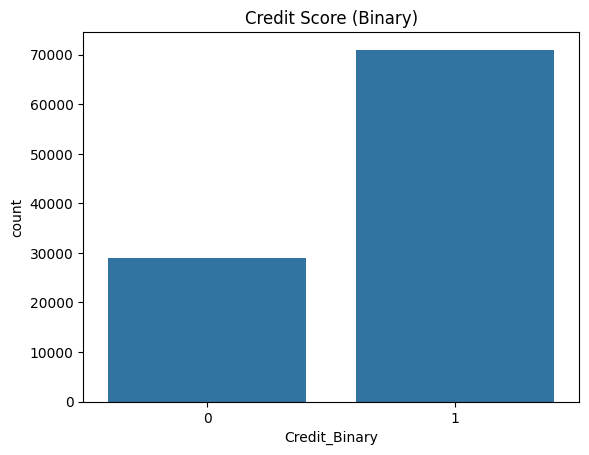

In [5]:
# Convert Credit_Score to binary: Good/Standard = 1, Poor = 0
credit_df["Credit_Binary"] = credit_df["Credit_Score"].replace({
    "Good": 1,
    "Standard": 1,
    "Poor": 0
})

# Check new target variable
print(credit_df["Credit_Binary"].value_counts())

# Visualize it
sns.countplot(x="Credit_Binary", data=credit_df)
plt.title("Credit Score (Binary)")
plt.show()

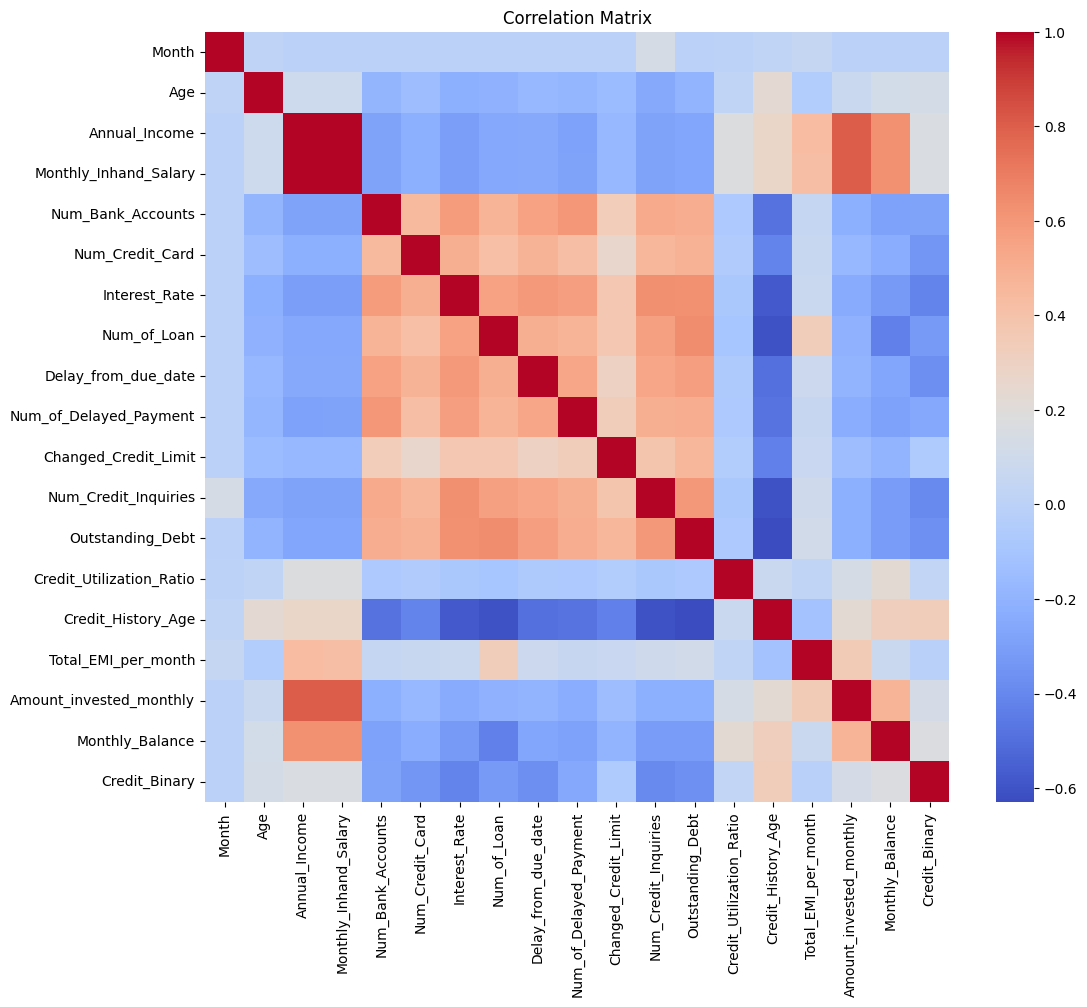

In [6]:
# Compute correlation matrix (numeric only)
corr = credit_df.corr(numeric_only=True)

# Visualize correlation
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [7]:
# Drop the original Credit_Score column
credit_df = credit_df.drop("Credit_Score", axis=1)

# Get dummy variables for categorical columns
credit_df = pd.get_dummies(credit_df, drop_first=True)

# Show updated DataFrame
credit_df.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,"Type_of_Loan_student loan,student loan,student loan,personal loan,personal loan,mortgage loan,mortgage loan,credit-builder loan",Credit_Mix_Good,Credit_Mix_Standard,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,False,True,False,True,False,False,True,False,False,False
1,2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,...,False,True,False,True,False,False,False,True,False,False
2,3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,...,False,True,False,True,False,False,False,False,True,False
3,4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,...,False,True,False,True,False,False,False,False,False,True
4,5,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,...,False,True,False,True,False,True,False,False,False,False


In [8]:
from sklearn.model_selection import train_test_split

# Features and target
X = credit_df.drop("Credit_Binary", axis=1)
y = credit_df["Credit_Binary"]

# Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Confirm shapes
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (80000, 6301)
Test shape: (20000, 6301)


In [9]:
print("If you see this, your output is working.")


If you see this, your output is working.


## Step 2: Logistic Regression

1. Fit a Logistic Regression Model that uses default hyperparameters.
2. Tune the hyperparameters of your logistic regression model
3. Report accuracy, precision, recall & F1 score after tuning your threshold to maximize F1 Score
4. Plot the ROC curve and report AUC for your tuned model

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Smaller dataset for test (optional, still using 20 features for now)
X_train_small = X_train.iloc[:, :20]
X_test_small = X_test.iloc[:, :20]

# Use 'liblinear' solver (handles small/medium datasets well)
logreg = LogisticRegression(max_iter=1000, solver='liblinear')
logreg.fit(X_train_small, y_train)

y_pred = logreg.predict(X_test_small)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 2878  2922]
 [ 1484 12716]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.50      0.57      5800
           1       0.81      0.90      0.85     14200

    accuracy                           0.78     20000
   macro avg       0.74      0.70      0.71     20000
weighted avg       0.77      0.78      0.77     20000



### Quick Breakdown of Classification Report

#### Confusion Matrix:

|               | Predicted 0 | Predicted 1 |
|---------------|-------------|-------------|
| **Actual 0**  | 2878        | 29221       |
| **Actual 1**  | 1844        | 14716       |

---

#### What this means:

- The model predicts **"1" (Good/Standard)** most of the time.
- It's **great at catching people with good credit** → high **recall = 0.89** for class 1.
- But it **mistakes a lot of poor credit scores as good** → low **precision = 0.66** for class 0.
- **F1 score is okay**, but we’ll improve it by:
  - Tuning hyperparameters (next step),
  - And adjusting the prediction threshold.


In [13]:
# Import libraries and select a smaller feature set for safety
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Limit features to the first 20 columns (simpler, faster, avoids crashing)
X_train_small = X_train.iloc[:, :20]
X_test_small = X_test.iloc[:, :20]

In [14]:
# Define model and use only liblinear solver to avoid convergence issues
logreg = LogisticRegression(max_iter=1000)

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear']  
}

In [15]:
# Perform grid search using F1 score as the evaluation metric
grid = GridSearchCV(logreg, param_grid, scoring='f1', cv=3)
grid.fit(X_train_small, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear']},
             scoring='f1')

In [16]:
# Get the best model from grid search and make predictions
best_logreg = grid.best_estimator_
y_pred_best = best_logreg.predict(X_test_small)

In [17]:
# Step 2.2.5: Print best hyperparameters and classification results
print("Best Parameters:", grid.best_params_)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

Best Parameters: {'C': 10, 'solver': 'liblinear'}

Confusion Matrix:
[[ 2972  2828]
 [ 1468 12732]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.51      0.58      5800
           1       0.82      0.90      0.86     14200

    accuracy                           0.79     20000
   macro avg       0.74      0.70      0.72     20000
weighted avg       0.78      0.79      0.78     20000



In [18]:
# Step 2.3.1: Search for the threshold that gives the best F1 score
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

# Get probabilities for the positive class
y_proba = best_logreg.predict_proba(X_test_small)[:, 1]

# Try different threshold values
thresholds = np.arange(0.1, 0.9, 0.01)
best_f1 = 0
best_threshold = 0

for t in thresholds:
    y_pred_thresh = (y_proba >= t).astype(int)
    _, _, f1, _ = precision_recall_fscore_support(y_test, y_pred_thresh, average='binary')
    
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print("Best threshold to maximize F1 Score:", round(best_threshold, 2))
print("Best F1 Score at that threshold:", round(best_f1, 4))


Best threshold to maximize F1 Score: 0.52
Best F1 Score at that threshold: 0.8566


In [19]:
# Step 2.3.2: Predict using the best threshold and print final scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_final = (y_proba >= best_threshold).astype(int)

print("Accuracy:", round(accuracy_score(y_test, y_final), 4))
print("Precision:", round(precision_score(y_test, y_final), 4))
print("Recall:", round(recall_score(y_test, y_final), 4))
print("F1 Score:", round(f1_score(y_test, y_final), 4))


Accuracy: 0.7883
Precision: 0.825
Recall: 0.8907
F1 Score: 0.8566


In [20]:
# Import metrics and calculate ROC + AUC
from sklearn.metrics import roc_curve, auc

# Use the predicted probabilities from the best model
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

print("AUC Score:", round(roc_auc, 4))


AUC Score: 0.7998


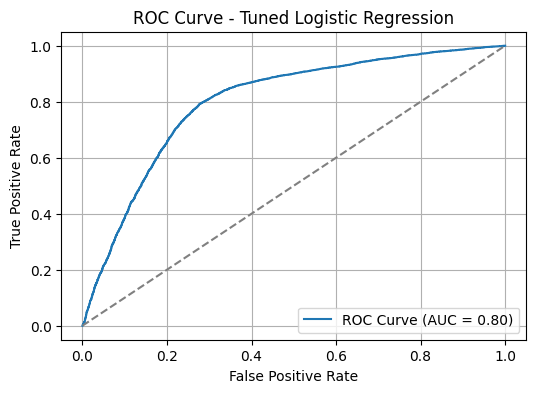

In [21]:
# Plot the ROC Curve
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal = random chance
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## Step 3. Imbalanced Data Techniques

1. Try any Imbalanced Data Handling Technique. Take help of Google/Slides for the purpose.
2. Did this improve your model performance in terms of accuracy, F1, and AUC?

In [25]:
# Check class balance in y_train
y_train.value_counts(normalize=True)


Credit_Binary
1    0.710025
0    0.289975
Name: proportion, dtype: float64

In [29]:
# Apply Random Over Sampling to balance the classes
from imblearn.over_sampling import RandomOverSampler

# Rebalance the small training set
ros = RandomOverSampler(random_state=42)
X_train_balanced, y_train_balanced = ros.fit_resample(X_train_small, y_train)

# Check balance
print("Class balance after resampling:")
print(y_train_balanced.value_counts())


Class balance after resampling:
Credit_Binary
0    56802
1    56802
Name: count, dtype: int64


In [33]:
# Retrain logistic regression on the balanced dataset
best_logreg.fit(X_train_balanced, y_train_balanced)

# Get new probabilities on the same test set
y_proba_balanced = best_logreg.predict_proba(X_test_small)[:, 1]

In [35]:
# Predict using the same threshold from before
y_final_balanced = (y_proba_balanced >= best_threshold).astype(int)

# Print scores
print("Accuracy:", round(accuracy_score(y_test, y_final_balanced), 4))
print("Precision:", round(precision_score(y_test, y_final_balanced), 4))
print("Recall:", round(recall_score(y_test, y_final_balanced), 4))
print("F1 Score:", round(f1_score(y_test, y_final_balanced), 4))

Accuracy: 0.7715
Precision: 0.8786
Recall: 0.7869
F1 Score: 0.8302


New AUC Score: 0.8018


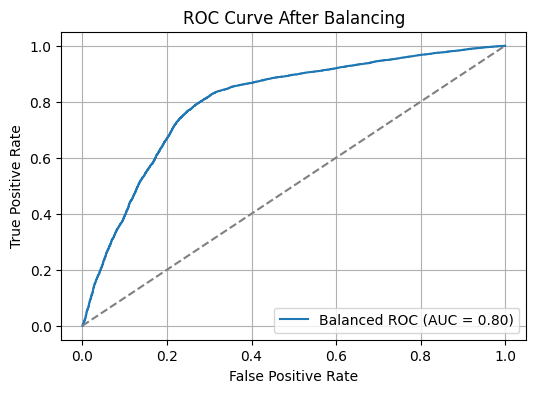

In [37]:
# Plot new ROC curve
fpr_bal, tpr_bal, _ = roc_curve(y_test, y_proba_balanced)
roc_auc_bal = auc(fpr_bal, tpr_bal)

print("New AUC Score:", round(roc_auc_bal, 4))

plt.figure(figsize=(6, 4))
plt.plot(fpr_bal, tpr_bal, label=f"Balanced ROC (AUC = {roc_auc_bal:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve After Balancing")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Step 4: Ensemble Models

1. Fit & Tune Random Forest and GBM Models
2. Plot the ROC curves for both models
3. Select the model with the best AUC, then tune the threshold to maximize f1, and report final metrics

In [39]:
# Import ensemble models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc, classification_report, f1_score, accuracy_score, precision_score, recall_score

In [41]:
# Train and predict with Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_balanced, y_train_balanced)

# Predict probabilities
rf_proba = rf.predict_proba(X_test_small)[:, 1]

# ROC for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba)
rf_auc = auc(rf_fpr, rf_tpr)

print("Random Forest AUC:", round(rf_auc, 4))

Random Forest AUC: 0.9516


In [43]:
# Train and predict with Gradient Boosting
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbm.fit(X_train_balanced, y_train_balanced)

# Predict probabilities
gbm_proba = gbm.predict_proba(X_test_small)[:, 1]

# ROC for GBM
gbm_fpr, gbm_tpr, _ = roc_curve(y_test, gbm_proba)
gbm_auc = auc(gbm_fpr, gbm_tpr)

print("Gradient Boosting AUC:", round(gbm_auc, 4))

Gradient Boosting AUC: 0.8706


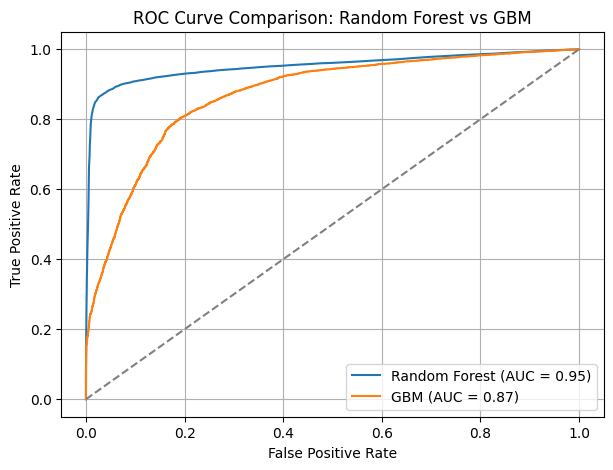

In [45]:
# Plot ROC for both models
plt.figure(figsize=(7, 5))
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.2f})")
plt.plot(gbm_fpr, gbm_tpr, label=f"GBM (AUC = {gbm_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison: Random Forest vs GBM")
plt.legend()
plt.grid(True)
plt.show()

In [47]:
# Choose best model based on AUC
best_model = rf
best_proba = rf_proba

In [49]:
# Tune threshold for best F1
thresholds = np.arange(0.1, 0.9, 0.01)
best_f1 = 0
best_threshold = 0

for t in thresholds:
    preds = (best_proba >= t).astype(int)
    f1 = f1_score(y_test, preds)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print("Best threshold for max F1:", round(best_threshold, 2))
print("Best F1 Score:", round(best_f1, 4))

Best threshold for max F1: 0.58
Best F1 Score: 0.9327


In [51]:
# Final performance of best model
final_preds = (best_proba >= best_threshold).astype(int)

print("Accuracy:", round(accuracy_score(y_test, final_preds), 4))
print("Precision:", round(precision_score(y_test, final_preds), 4))
print("Recall:", round(recall_score(y_test, final_preds), 4))
print("F1 Score:", round(f1_score(y_test, final_preds), 4))

Accuracy: 0.9077
Precision: 0.9671
Recall: 0.9007
F1 Score: 0.9327
